# API

In [221]:
import requests
import json
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [104]:
url = r"https://data.baltimorecity.gov/resource/9agw-sxsr.json"

In [105]:
response = requests.get(url)

In [106]:
response.status_code

200

In [107]:
data311 = response.json()

In [108]:
type(data311)

list

In [109]:
len(data311)

1000

In [110]:
type(data311[0])

dict

In [111]:
data311[0]

{'srrecordid': '5004M00000enAYDQA2',
 'servicerequestnum': '20-00510962',
 'srtype': 'ECC-Information Request',
 'methodreceived': 'Phone',
 'createddate': '2020-08-05T20:59:46.000',
 'srstatus': 'Closed',
 'statusdate': '2020-08-05T20:59:46.000',
 'duedate': '2020-08-05T16:59:46.000',
 'closedate': '2020-08-05T21:00:06.000',
 'agency': 'Call Center'}

In [112]:
data311[1]

{'srrecordid': '5004M00000enAY8QAM',
 'servicerequestnum': '20-00510961',
 'srtype': 'BGE-StLight(s) Out',
 'methodreceived': 'Phone',
 'createddate': '2020-08-05T20:59:40.000',
 'srstatus': 'New',
 'statusdate': '2020-08-05T20:59:39.000',
 'duedate': '2020-08-09T20:59:39.000',
 'agency': 'BGE',
 'address': '3706 WOODLEA AVE, Baltimore City, 21206',
 'zipcode': '21206',
 'neighborhood': 'Waltherson',
 'councildistrict': '3',
 'policedistrict': 'Northeastern',
 'latitude': '39.340321226128005',
 'longitude': '-76.559594211478550',
 'geolocation': {'latitude': '39.340321226128005',
  'longitude': '-76.55959421147855'},
 ':@computed_region_gwq4_fjxs': '206',
 ':@computed_region_5kre_ccpb': '248',
 ':@computed_region_s6p5_2pgr': '13991'}

In [113]:
data311[0].keys()

dict_keys(['srrecordid', 'servicerequestnum', 'srtype', 'methodreceived', 'createddate', 'srstatus', 'statusdate', 'duedate', 'closedate', 'agency'])

In [114]:
data311[1].keys()

dict_keys(['srrecordid', 'servicerequestnum', 'srtype', 'methodreceived', 'createddate', 'srstatus', 'statusdate', 'duedate', 'agency', 'address', 'zipcode', 'neighborhood', 'councildistrict', 'policedistrict', 'latitude', 'longitude', 'geolocation', ':@computed_region_gwq4_fjxs', ':@computed_region_5kre_ccpb', ':@computed_region_s6p5_2pgr'])

In [115]:
data311[1]['geolocation']

{'latitude': '39.340321226128005', 'longitude': '-76.55959421147855'}

In [116]:
data311[0]['srrecordid']

'5004M00000enAYDQA2'

In [117]:
type(data311[0])

dict

In [118]:
info311 = str(data311[0].keys())

In [185]:
dict_info = {'srtype':[],
              'methodreceived':[],
              'createddate':[],
              'duedate':[],
             'closedate':[],
             'statusdate':[],
              'agency':[],
              'lastactivity':[],
              'neighborhood':[],
              'councildistrict':[],
              'policedistrict':[],
              'zipcode':[],
              'srstatus':[]
             
             }

style_name = []
style_descr = []

In [186]:
for data in data311:
    
    for key in dict_info.keys():
        try:
            dict_info[key].append(data[key])
        except KeyError:
            dict_info[key].append(np.nan)    
    try:
        style_name.append(data['style']['name'])
    except KeyError:
            style_name.append(np.nan)
            
    try:
        style_descr.append(data['style']['description'])
    except KeyError:
            style_descr.append(np.nan)

# Dataframe

In [224]:
data_df = pd.DataFrame(data=dict_info)
data_df.head(100)

,srtype,methodreceived,createddate,duedate,closedate,statusdate,agency,lastactivity,neighborhood,councildistrict,policedistrict,zipcode,srstatus
0,ECC-Information Request,Phone,2020-08-05T20:59:46.000,2020-08-05T16:59:46.000,2020-08-05T21:00:06.000,2020-08-05T20:59:46.000,Call Center,NaN,NaN,NaN,NaN,NaN,Closed
1,BGE-StLight(s) Out,Phone,2020-08-05T20:59:40.000,2020-08-09T20:59:39.000,NaN,2020-08-05T20:59:39.000,BGE,NaN,Waltherson,3,Northeastern,21206,New
2,BGE-StLight(s) Out,Phone,2020-08-05T20:58:05.000,2020-08-09T20:58:05.000,NaN,2020-08-05T20:58:05.000,BGE,NaN,Coldstream Homestead Montebello,14,Northeastern,21218,New
3,BGE-StLight(s) Out,Phone,2020-08-05T20:57:58.000,2020-08-09T20:57:58.000,NaN,2020-08-05T20:57:58.000,BGE,NaN,Cheswolde,5,Northwestern,21209,New
4,ECC-Information Request,Phone,2020-08-05T20:57:48.000,2020-08-05T16:57:48.000,2020-08-05T20:58:46.000,2020-08-05T20:57:48.000,Call Center,NaN,NaN,NaN,NaN,NaN,Closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,SW-Mixed Refuse,API,2020-08-05T19:48:08.000,2020-08-06T19:48:08.000,NaN,2020-08-05T19:48:08.000,Solid Waste,Service Response,Guilford,14,Northern,21218,New
96,SW-Recycling,Phone,2020-08-05T19:47:05.000,2020-08-06T19:47:05.000,NaN,2020-08-05T19:47:05.000,Solid Waste,Service Response,Berea,13,Eastern,21213,New
97,SW-Recycling,Phone,2020-08-05T19:46:36.000,2020-08-06T19:46:36.000,NaN,2020-08-05T19:46:36.000,Solid Waste,Service Response,Berea,13,Eastern,21213,New
98,ECC-Information Request,Phone,2020-08-05T19:46:09.000,2020-08-05T15:46:09.000,2020-08-05T19:46:17.000,2020-08-05T19:46:09.000,Call Center,NaN,NaN,NaN,NaN,NaN,Closed


# Clean and Transform Data

In [147]:
data_df.isnull().sum()

srtype               0
methodreceived       0
createddate          0
duedate              0
agency               0
lastactivity       471
neighborhood       430
councildistrict    429
policedistrict     429
zipcode            415
latitude           414
longitude          414
geolocation        414
srstatus             0
dtype: int64

In [148]:
data_df.shape

(1000, 14)

In [274]:
data_df['weekday'] = pd.to_datetime(data_df['createddate'], format='%w')

In [247]:
data_df['createddate'] = pd.to_datetime(data_df['createddate'], format='%A-%Y-%m-%d %H:%M:%S')

In [248]:
data_df['duedate'] = pd.to_datetime(data_df['duedate'], format='%A-%Y-%m-%d %H:%M:%S')

In [249]:
data_df['closedate'] = pd.to_datetime(data_df['closedate'], format='%A-%Y-%m-%d %H:%M:%S')

In [250]:
data_df['actual_time_spent'] = data_df['closedate'] - data_df['createddate'] 

In [251]:
data_df['expected_time_spent'] = data_df['duedate'] - data_df['createddate']

In [272]:
data_df.head()

,srtype,methodreceived,createddate,duedate,closedate,statusdate,agency,lastactivity,neighborhood,councildistrict,policedistrict,zipcode,srstatus,actual_time_spent,expected_time_spent,weekday
0,ECC-Information Request,Phone,2020-08-05 20:59:46,2020-08-05 16:59:46,2020-08-05 21:00:06,2020-08-05T20:59:46.000,Call Center,NaN,NaN,NaN,NaN,NaN,Closed,00:00:20,-1 days +20:00:00,2020-08-05 20:59:46
1,BGE-StLight(s) Out,Phone,2020-08-05 20:59:40,2020-08-09 20:59:39,NaT,2020-08-05T20:59:39.000,BGE,NaN,Waltherson,3,Northeastern,21206,New,NaT,3 days 23:59:59,2020-08-05 20:59:40
2,BGE-StLight(s) Out,Phone,2020-08-05 20:58:05,2020-08-09 20:58:05,NaT,2020-08-05T20:58:05.000,BGE,NaN,Coldstream Homestead Montebello,14,Northeastern,21218,New,NaT,4 days 00:00:00,2020-08-05 20:58:05
3,BGE-StLight(s) Out,Phone,2020-08-05 20:57:58,2020-08-09 20:57:58,NaT,2020-08-05T20:57:58.000,BGE,NaN,Cheswolde,5,Northwestern,21209,New,NaT,4 days 00:00:00,2020-08-05 20:57:58
4,ECC-Information Request,Phone,2020-08-05 20:57:48,2020-08-05 16:57:48,2020-08-05 20:58:46,2020-08-05T20:57:48.000,Call Center,NaN,NaN,NaN,NaN,NaN,Closed,00:00:58,-1 days +20:00:00,2020-08-05 20:57:48


In [241]:
sdata_df = data_df.dropna()
sdata_df.head()

,srtype,methodreceived,createddate,duedate,closedate,statusdate,agency,lastactivity,neighborhood,councildistrict,policedistrict,zipcode,srstatus,actual_time_spent,expected_time_spent
107,HLTH-Animal Attack Against Human,Phone,2020-08-05 19:38:06,2020-08-14 19:38:06,2020-08-05 19:56:05,2020-08-05T19:56:04.000,Health,Service Response,Hamilton Hills,3,Northeastern,21234,Closed,00:17:59,9 days 00:00:00
114,TRS-Parking Complaint,Phone,2020-08-05 19:30:36,2020-08-06 19:45:06,2020-08-05 20:11:21,2020-08-05T20:11:20.000,Transportation,Service Response,Union Square,9,Southern,21223,Closed,00:40:45,1 days 00:14:30
130,TRM-Debris In Roadway,API,2020-08-05 19:23:09,2020-08-06 19:23:09,2020-08-05 19:51:14,2020-08-05T19:51:07.000,Transportation,Service Response,Westgate,8,Southwestern,21229,Closed,00:28:05,1 days 00:00:00
137,ECC-Miscellaneous Request,API,2020-08-05 19:20:08,2020-08-05 15:20:08,2020-08-05 20:14:42,2020-08-05T20:14:41.000,Call Center,Service Response,North Harford Road,3,Northeastern,21234,Closed,00:54:34,-1 days +20:00:00
154,ECC-Miscellaneous Request,API,2020-08-05 19:11:44,2020-08-05 15:11:44,2020-08-05 20:11:06,2020-08-05T20:11:05.000,Call Center,Service Response,Upper Fells Point,1,Southeastern,21231,Closed,00:59:22,-1 days +20:00:00


In [242]:
sdata_df.shape

(177, 15)

In [243]:
sdata_df.describe()

,actual_time_spent,expected_time_spent
count,177,177
mean,0 days 00:11:53.350282,5 days 12:49:47.830508
std,0 days 00:38:00.317841,2 days 23:32:58.793447
min,0 days 00:00:06,-1 days +20:00:00
25%,0 days 00:00:14,5 days 00:00:00
50%,0 days 00:00:15,7 days 00:00:00
75%,0 days 00:00:40,7 days 00:00:00
max,0 days 03:27:22,20 days 00:00:00


# Visualization

In [158]:
import seaborn as sns

Text(0.5, 1.0, 'Requests by Police District')

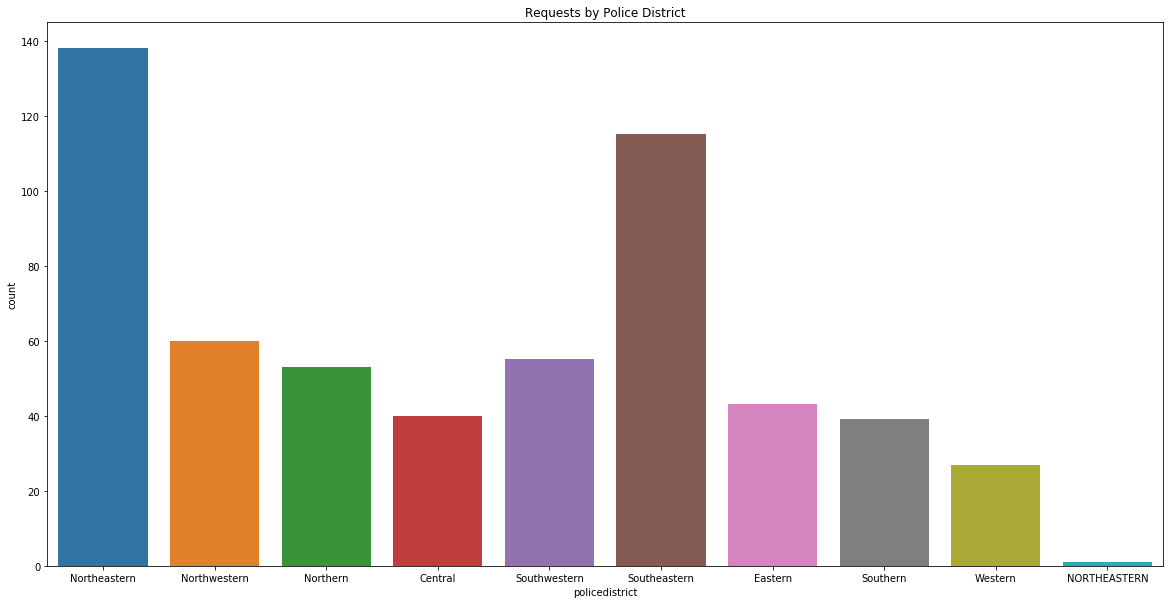

In [165]:
plt.figure(figsize=(20,10))
sns.countplot(x=data_df['policedistrict'])
plt.title('Requests by Police District')

Text(0.5, 1.0, 'Requests by Neighborhood')

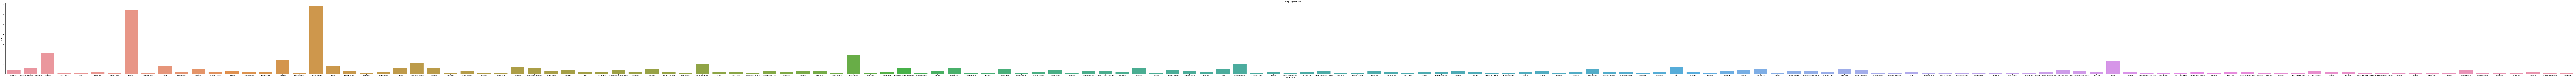

In [179]:
plt.figure(figsize=(350,10))
sns.countplot(x=data_df['neighborhood'])
plt.title('Requests by Neighborhood')

Text(0.5, 1.0, 'Requests by Council District')

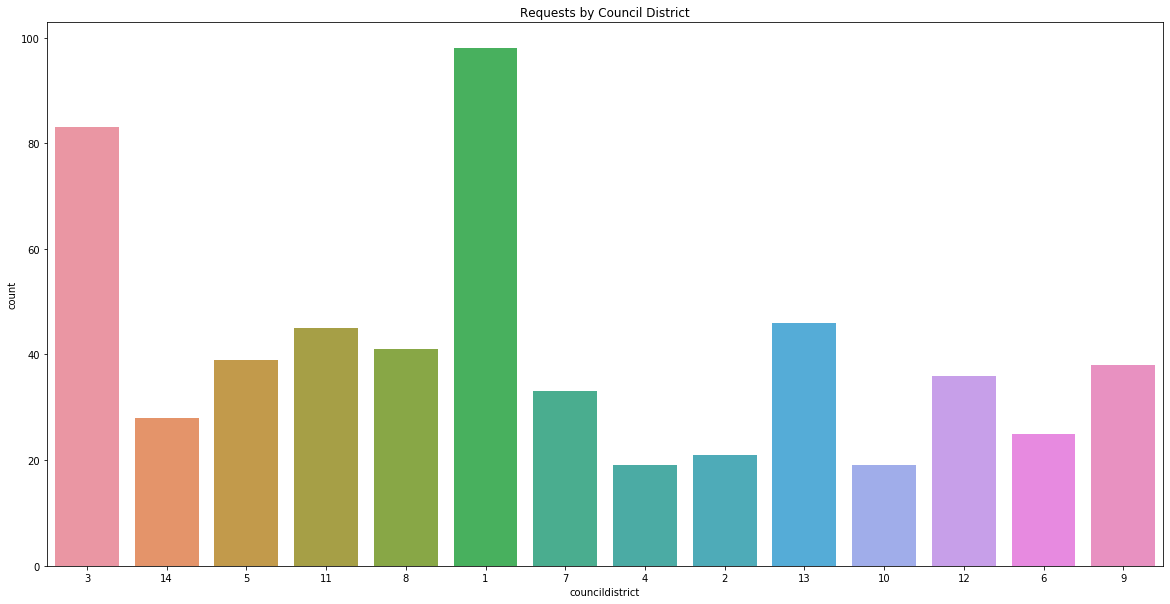

In [167]:
plt.figure(figsize=(20,10))
sns.countplot(x=data_df['councildistrict'])
plt.title('Requests by Council District')

Text(0.5, 1.0, 'Requests by Agency')

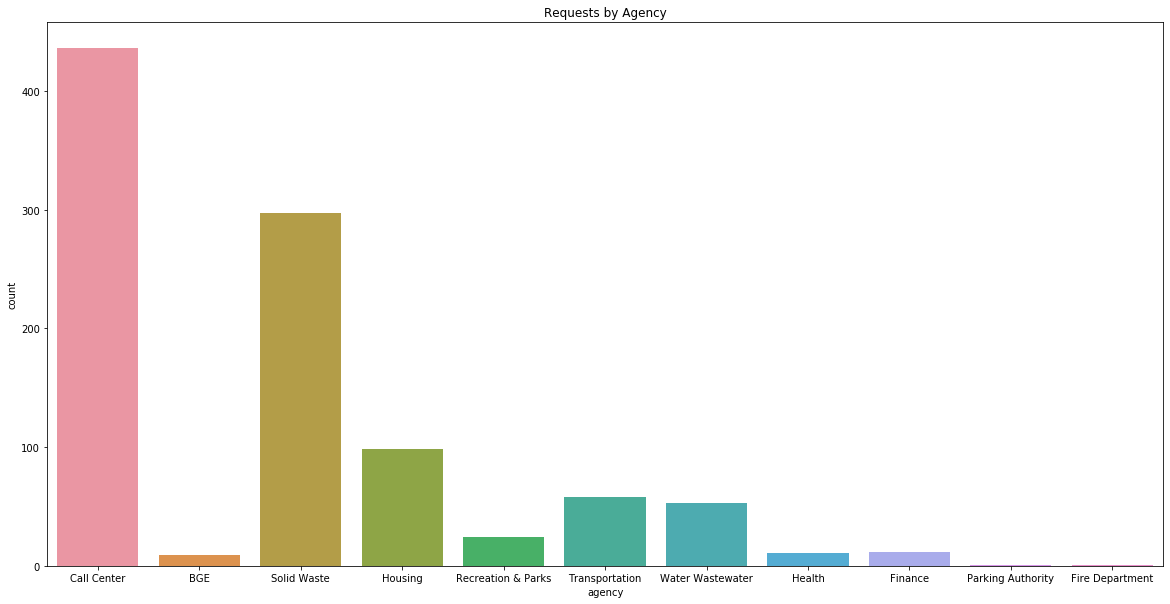

In [172]:
plt.figure(figsize=(20,10))
sns.countplot(x=data_df['agency'])
plt.title('Requests by Agency')

Text(0.5, 1.0, 'Status of Requests')

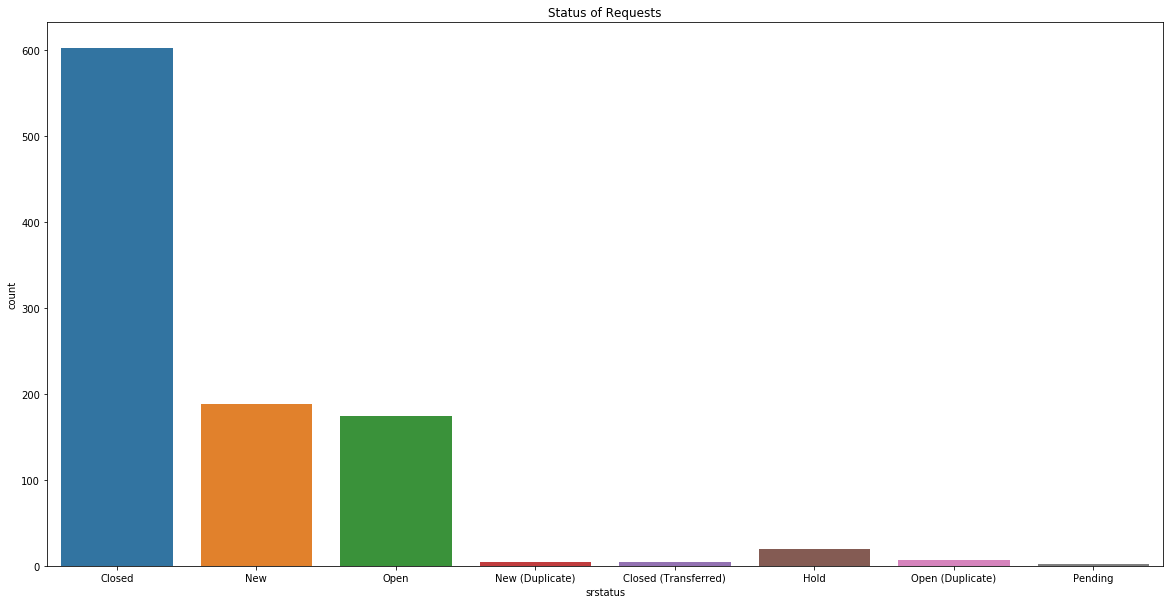

In [184]:
plt.figure(figsize=(20,10))
sns.countplot(x=data_df['srstatus'])
plt.title('Status of Requests')